# Seasonal Autoregressive Integrated Moving Average (SARIMA) Model

<p style="text-align: justify;">In this section we start time series modeling using Seasonal ARIMA. Before modeling, some basics of time series such as stationary or not stationary, trend, seasonality, etc. and how to deal with them will be discussed.  

## What is Stationary?
This concept is very important as SARIMA is used to model the time series. There are three criteria to be validated in order to consider a time series as a stationary one:
<br/>1) The _`Mean Value`_ is not a function of time
<br/>2) The _`Variance`_ is not a function of time
<br/>3) The _`Covariance`_ of the `i` th term and the `(i + m)` th term is not a function of time

<p style="text-align: justify;">The prerequisite for forecasting using stochastic models is that the model must be stationary.Thus, if the model is not stationary, it is obligated to make it stationary. An example of stationary series is _White Noise_. In addition to visualization checking, there are two statistical tests that can be used to check for stationary:

* `ADF` (Augmented Dickey Fuller) Test
* `KPSS` (Kwiatkowski-Phillips-Schmidt-Shin) Test

`Unit Root` stationary tests indicate that statistical properties are changing with time. Two above tests are implemented to determine the presence of unit root in the time series data. <p style="text-align: justify;">

The below table shows the situations that a time series are STATIONARY. 

|Test|Unit Root|Null Hypothesis|Test statistic is less than the critical value|p-value <= threshold|
| ------------- | ------------- | ------------- | ------------- | ------------- |
|ADF|NO|NO|YES|YES|
|KPSS|NO|YES|YES|NO|

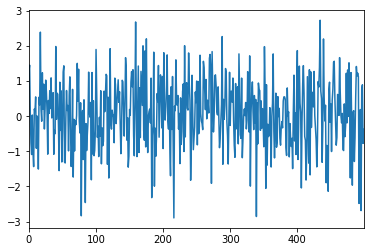

In [40]:
import matplotlib.pyplot as plt
from random import gauss
from random import seed
from pandas import Series

# Generation of White Noise as an example of stationary series
seed(1)
series = [gauss(0.0, 1.0) for i in range(500)]

# Converting the list to the series
series = Series(series)

# Plot the series
series.plot()

Although, This is somehow clear that the above series is stationary (visually checking for three mentioned criteria), in the following, we check the data using ADF and KPSS tests. The result confirms that the series is stationary.<p style="text-align: justify;"> 

In [41]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
import warnings

warnings.filterwarnings('ignore')

# Define ADF and KPSS Tests
def is_stationary_with_adf(data, significance_level=0.01):
    test = adfuller(data, regression='c', autolag='BIC')
    p_value = test[1]
    print("ADF p-value: {:0.5f}".format(p_value))
    return p_value < significance_level

def is_stationary_with_kpss(data, significance_level=0.05):
    test = kpss(data, regression='c')
    p_value = test[1]
    print("KPSS p-value: {:0.5f}".format(p_value))
    return p_value > significance_level

# Show result
print("Stationary by ADF: {}".format(
    "yes" if is_stationary_with_adf(series) else "no"))
print("Stationary by KPSS: {}".format(
    "yes" if is_stationary_with_kpss(series) else "no"))

ADF p-value: 0.00000
Stationary by ADF: yes
KPSS p-value: 0.10000
Stationary by KPSS: yes


It should be noted that we have different types of stationary. For example, in trend stationary the series does not exhibit a trend, and in seasonal stationary, the series does not show any seasonality).

# Make It Stationary!
In the case that the series is not stationary, we need to convert them to the stationary one. Observations from a non-stationary time series present trends, seasonal effects, and other attribute that are time dependent.<br />Unfortunately, most real-world time series datasets are not stationary!
There are some solutions to convert the non stationary time series to stationary time series datasets. The result also will be a series.
* **Trend Differencing**
* **Seasonal Differencing**
* **Transformation**

## Trend Differencing
In this method, we calculate the difference between two consecutive observation terms. This help us to remove the trend which is one of characteristic of non stationary series. If it is needed, we can take  differencing again to make the series stationary.

## Seasonal Differencing
This method is the same as the previous one except that the difference calculated between terms from one season to the next.

## Transformation
Transformation is useful when we have a varied variance series. There are different transformation methods such as Log, Square Root and Power transform.

Now, we are familiar with the basic concepts of time series. In the next step, the SARIMA model will be reviewed.

 In comparison to ARIMA, SARIMA model is used to analyze and forecast data that have an additional seasonal component. As we discussed before, our model have seasonality.<p style="text-align: justify;"> 

---

## SARIMA Model
ARIMA (Autoregressive Integrated Moving Average) is widely used for modeling of non-seasonal time series data. This method supports the trend component (By eliminating it using trend Differencing) while, it can not handle the seasonal component.
<br/>SARIMA as a modified version of ARIMA can be used for modeling of time series with seasonal component. SARIMA model has 6 hyper-parameters: <p style="text-align: justify;">
<img src="Figures/SarimaEQ.JPG" height="400" width="350">
* **p** (Trend autoregression order):It implies the output variable at time `t` is a weighted sum of past values.
* **d** (Trend differencing order):The number of differences needed to be applied to the series that make it stationarity.
* **q** (Trend moving average order): This is a moving average of previous error terms.
<br/><br/>
* **P** (Seasonal autoregressive order): The same as `q` but operate across the number of period (`m`) in our season.
* **D** (Seasonal difference order): The same as `d` but operate across the number of period (`m`) in our season.
* **Q** (Seasonal moving average order): The same as `Q` but operate across the number of period (`m`) in our season.

**m** (Seasonal factor) is the number of time steps for a single seasonal period. For example, if there is a seasonal factor of 3 over a time series containing monthly data, the pattern repeats quarterly.


We have discussed about `m`,`d`, `D` (it defines similar to `d`). <br/>
It should be noted that if we want to use differencing to make the series stationary (for example removing trend), there are two ways to model the data with SARIMA:<p style="text-align: justify;">

* Using original series and `d`=1
* Using output series after implementing differencing and leave `d`=0

For setting other four hyper-parameters (at least as a first guess), we will use `ACF` and `PACF` plots. Also, we can use a wide range of hyper-parameters to find the optimum model (Grid Search).<p style="text-align: justify;">


## ACF and PACF PLOTS
These plots depict the strength of a relationship between a term in a time series with previous terms. If the distribution of variable is Gaussian, we can use the Pearson correlation coefficient which describes a negative (-1),positive (1) and no (0) correlation.
A plot of the autocorrelation of a time series by lag is called the **AutoCorrelation Function (ACF)**.
Confidence interval that is set to a 95%, shows that correlation values outside of this region are not realisic.
On the other hand, a **Partial AutoCorrelation Function (PACF)** shows the relationship between an observation with observations at prior time steps with the relationships of intervening observations removed.
The trend elements (`p`,`q`) can be selected through analysis of both ACF and PACF plots looking at the recent time steps, and for seasonal elements (`P`,`Q`), we can specify values by looking at correlation at seasonal lag time steps.
In the following, an example of using these plots are shown. The blue region is the confidence interval.


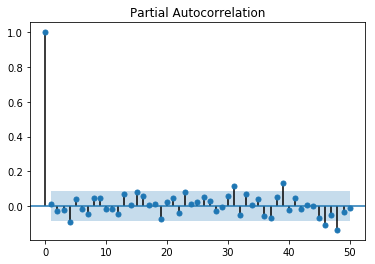

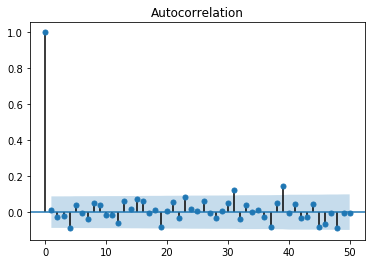

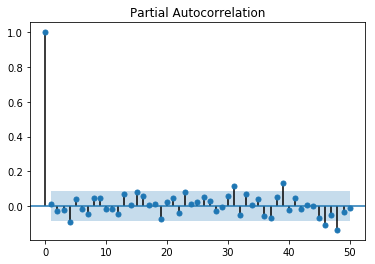

In [44]:
import matplotlib.pyplot as plt
from random import gauss
from random import seed
from pandas import Series
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Generate a List
seed(1)
series = [gauss(0.0, 1.0) for i in range(500)]

# Convert the List to Series
series = Series(series)

# Plot ACF and PACF
plot_acf(series, lags=50)
plot_pacf(series, lags=50)

For choosing SARIMA hyper-parameters, the below rules could be used:
* `p` is equal to the first lag where the `PACF` value is above the confidence level.
* `q` is equal to the first lag where the `ACF` value is above the confidence level.
* `P` ≥ 1 if the `ACF` is positive at lag `m`, otherwise `P`=0.
* `Q` ≥ 1 if the `ACF` is negative at lag `m`, otherwise `Q`=0.

So, the initial values for six hyper parameters of SARIMA are determined.
As it was mentioned before, optimization using applicable ranges of hyper-parameters is an alternative for determination of SARIMA hyper-parameters.<p style="text-align: justify;">

A Graphical summary of SARIMA model consisting of the model description and modeling steps is shown below ([Original Size](https://github.com/MOAMSA/Investigation-of-US-Energy-Consumption-/blob/master/Figures/SARIMA.jpg)): 

<img src="Figures/SARIMA.jpg" height="3000" width="2000">

We have reviewed some basics of SARIMA model. Let's start modeling the energy consumption data using SARIMA.

---

## Hourly Energy Consumption Modeling using SARIMA

In this section, we will use SARIMA model to model the dataset. First, required libraries are imported to analysis the time series. 

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from math import sqrt
from statsmodels.tsa.statespace import sarimax
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

warnings.filterwarnings('ignore')

In the next step and after importing data from the CSV file, the dataset is split to a training set and a test set (70% and 30%, respectively). Data from 2002-01-01 to 2014-01-01 is considered as the training set.

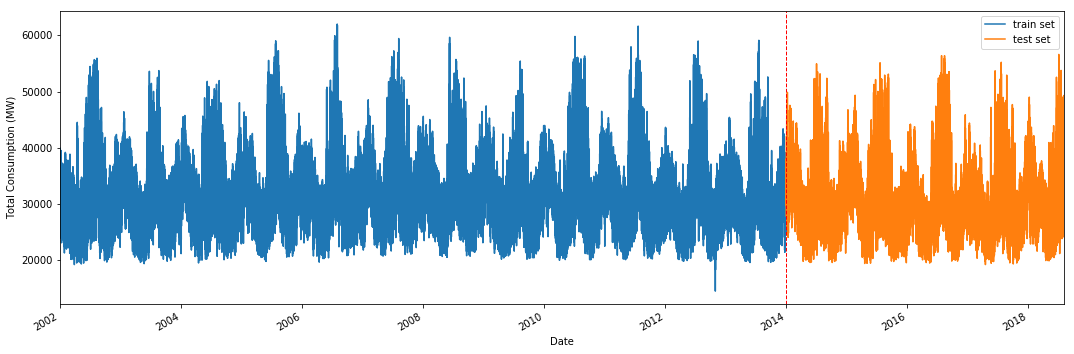

In [5]:
# Import Data
df = pd.read_csv("Sources\EastTotalConsumption.csv", header=1, skiprows=None, parse_dates=[0], names=['datetime', 'totalconsum'])

# Split the data
train_range = df[df.datetime < '2014-01-01' ].index
test_range = df[(df.datetime >= '2014-01-01')].index

# Plot Original Data (Hourly)
fig, ax = plt.subplots(figsize=(18,6))
df.loc[train_range].plot(x="datetime", y="totalconsum", ax=ax, label="train set")
df.loc[test_range].plot(x="datetime", y="totalconsum", ax=ax, label="test set")
dt=pd.to_datetime(str(df.loc[test_range].datetime.values[0]))
plt.axvline(dt, c='red', ls='--', lw=1)
plt.xlabel("Date")
plt.ylabel("Total Consumption (MW)")
plt.show()

 There are around 150,000 samples in the dataset which cause data analysis be time consuming. So, the data is re-sampled bi-weekly.<p style="text-align: justify;">  

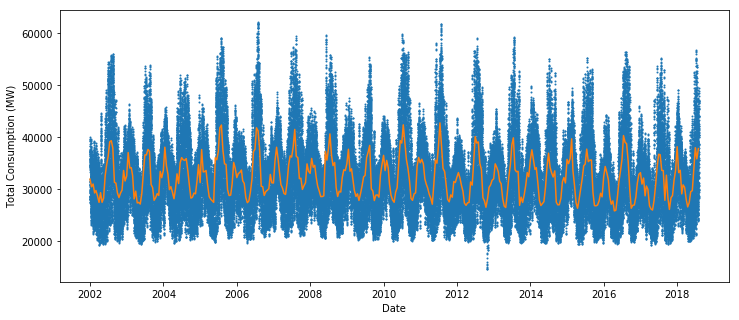

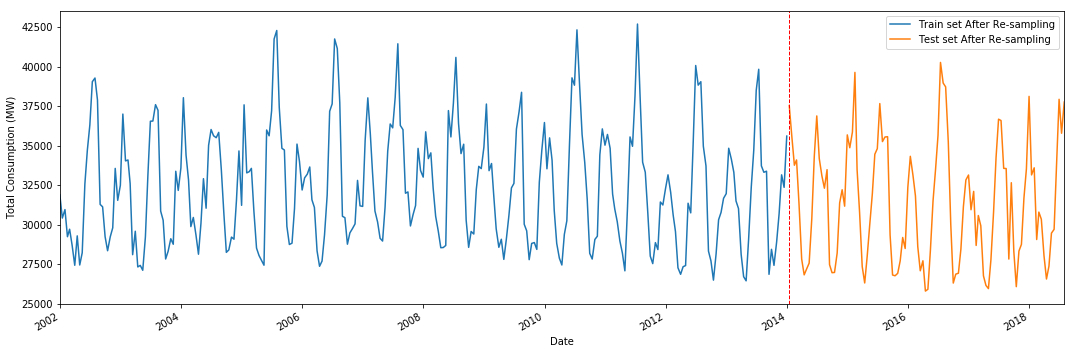

In [6]:
# Re-sampling (Bi-Weekly)
datatable_re=df.reset_index().set_index('datetime')
datatable_re.index = pd.to_datetime(datatable_re.index)
datatable_re=datatable_re.resample('sm').mean()

# Plot re-sampled data
plt.figure(figsize=(12,5))
plt.plot(pd.to_datetime(df.datetime), df.totalconsum,'o',markersize=1, label="Train")
plt.plot(datatable_re.index, datatable_re.totalconsum,'-',markersize=1, label="Train")
plt.xlabel("Date")
plt.ylabel("Total Consumption (MW)")
plt.show()
datatable_re["datetime"]=datatable_re.index
df=datatable_re

# Plot Train and Test Set after Re-sampling
train_range_re = df[df.datetime < '2014-01-01' ].index
test_range_re = df[(df.datetime >= '2014-01-01')].index
fig, ax = plt.subplots(figsize=(18,6))
df.loc[train_range_re].plot(x="datetime", y="totalconsum", ax=ax, label="Train set After Re-sampling")
df.loc[test_range_re].plot(x="datetime", y="totalconsum", ax=ax, label="Test set After Re-sampling")
dt=pd.to_datetime(str(df.loc[test_range_re].datetime.values[0]))
plt.axvline(dt, c='red', ls='--', lw=1)
plt.xlabel("Date")
plt.ylabel("Total Consumption (MW)")
plt.show()

As we discussed before, we can use the `Decomposition` method to evaluate the data. Based on model structure, the additive model is selected. As the pattern is repeated yearly and the dataset contains bi-weekly samples, the seasonal factor is set to 24.<p style="text-align: justify;">

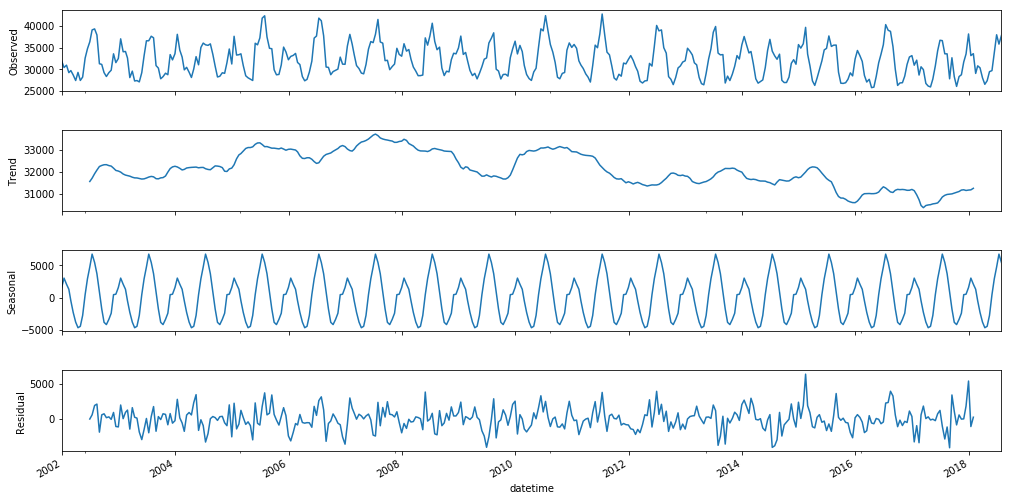

In [7]:
# Decompose the re-sampled data
# Set Decomposition frequency to the seasonal factor
seasons = 24

# Model type: Additive, There is no variation in Seasonality component
model = 'additive'

decomposition = seasonal_decompose(
    df.set_index("datetime").totalconsum.interpolate("linear"),
    freq=seasons,
    model=model)

# Plot the result of decomposing
fig = decomposition.plot()
fig.set_size_inches(16, 8)
plt.show()

Based on the above figure, we have no obvious trend in the dataset while there is seasonality. This helps us to find the best model hyper-parameters. For example, it shows that we might need to apply seasonal differencing to remove the seasonality component.<p style="text-align: justify;"> 

In the following, the re-sampled data will be tested regarding stationary. Two ADF and KPSS tests are used. According to  results, that both tests confirm that the series is not stationary (using the table in the section _"What is Stationary?"_ and from the last two columns).   

In [45]:
# First Check by Tests after Re-sampling
# Stationary Tests Definition:
# ADF test:
def ADF_Test(df):
    significance_level=0.05
    print ('\nDickey-Fuller Test:')
    ADF = adfuller(df,regression='c', autolag='BIC', maxlag=seasons)
    Adf_results = pd.Series(ADF[0:4], index=[' Test_Statistic',' p_value',' Lags',' No_of_Obs'])
    for num,value in ADF[4].items():
       Adf_results['Critical_Value(%s)'%num] = value
    print (Adf_results)
    return ADF[1] < significance_level

# KPSS test:
def KPSS_Test(df):
    significance_level = 0.03
    print ('\nKPSS Test:')
    KPS = kpss(df, regression='c',lags=seasons)
    kpss_results = pd.Series(KPS[0:3], index=[' Test_Statistic',' p_value',' Lags'])
    for num,value in KPS[3].items():
     kpss_results['Critical_Value(%s)'%num] = value
    print (kpss_results)
    return KPS[1] > significance_level

# Apply tests to re-sampled data
print("Stationary by ADF (Original Series_Resampled): {}".format("YES" if ADF_Test(df.totalconsum.dropna()) else "NO"))
print("Stationary by KPSS (Original Series_Resampled) : {}".format("YES" if KPSS_Test(df.totalconsum.dropna()) else "NO"),'\n')



Dickey-Fuller Test:
 Test_Statistic         -1.858975
 p_value                 0.351600
 Lags                   23.000000
 No_of_Obs             375.000000
Critical_Value(1%)      -3.447909
Critical_Value(5%)      -2.869278
Critical_Value(10%)     -2.570892
dtype: float64
Stationary by ADF (Original Series_Resampled): NO

KPSS Test:
 Test_Statistic          0.600629
 p_value                 0.022579
 Lags                   24.000000
Critical_Value(10%)      0.347000
Critical_Value(5%)       0.463000
Critical_Value(2.5%)     0.574000
Critical_Value(1%)       0.739000
dtype: float64
Stationary by KPSS (Original Series_Resampled) : NO 



To check the basic criteria for stationary, the `mean`  and `std` values are plotted to see their variations. The below figure shows constant mean and deviation, but there is seasonality in the dataset.<p style="text-align: justify;">

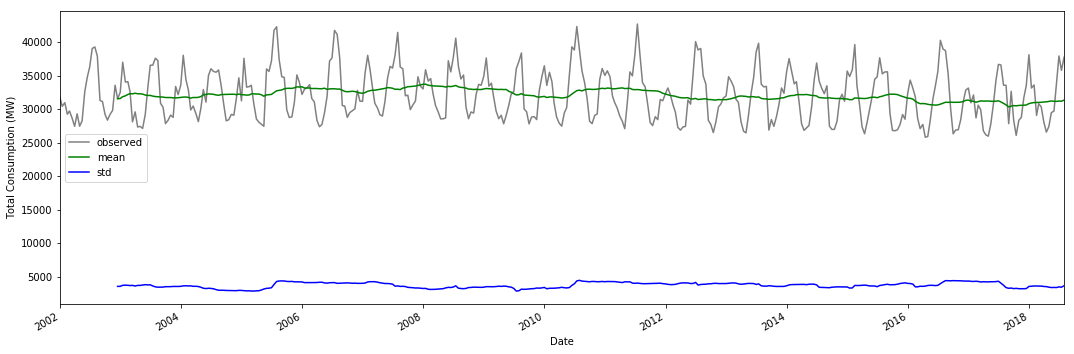

In [46]:
# First Visual check of re-sampled data

# Define Visual Check function:
def visual_check(df, totalconsum, seasons):
    df['mean'] = df[totalconsum].rolling(window=seasons).mean()
    df['std'] = df[totalconsum].rolling(window=seasons).std()
    fig, ax = plt.subplots(figsize=(18, 6))
    df.plot(x="datetime", y=totalconsum, ax=ax, label="observed", c='grey')
    df.plot(x="datetime", y=['mean'], ax=ax, label=['mean'], c='green')
    df.plot(x="datetime", y=['std'], ax=ax, label=['std'], c='blue')
    plt.xlabel("Date")
    plt.ylabel("Total Consumption (MW)")
    plt.show();

# Apply Visul_check function to the re-sampled data
visual_check(df, "totalconsum", seasons)

Generally, ACF and PACF plots are used to determine which terms of SARIMA model should be used. In Addition, it gives us information about the series stationary condition. As you can see, the plot shows strong autocorrelation and seasonality, and We have some lags out of confidence intervals which means the series is not stationary.<p style="text-align: justify;">

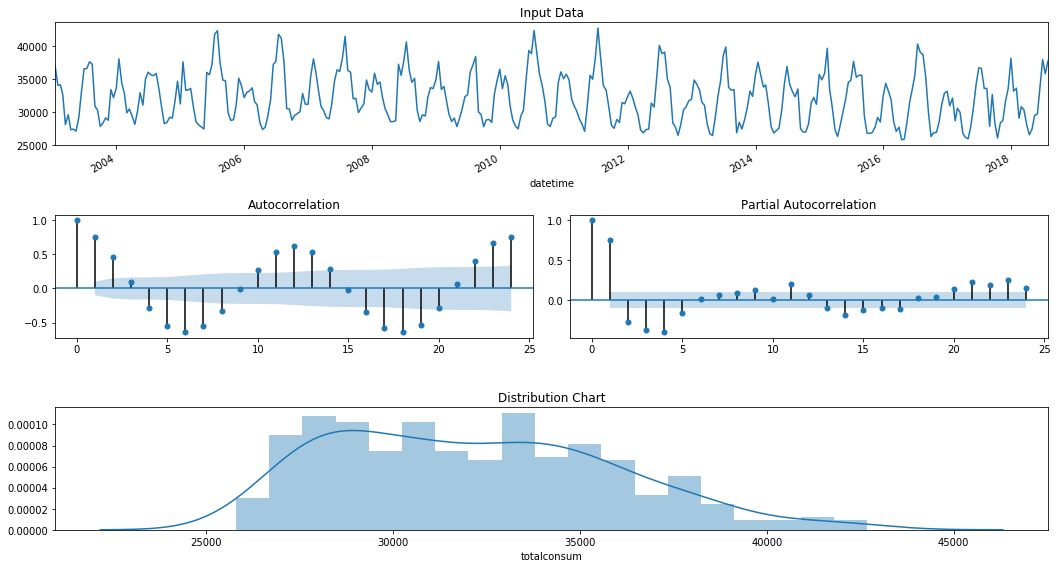

In [10]:
# First Check by ACF & PACF

# Define ACF & PACF Plot
def ACF_PACF_PLOT(ts, lags_plots, figsize=(22, 8)):
    y = pd.Series(ts)
    ax1 = plt.subplot2grid((3, 3), (0, 0), colspan=2)
    ax2 = plt.subplot2grid((3, 3), (1, 0))
    ax3 = plt.subplot2grid((3, 3), (1, 1))
    ax4 = plt.subplot2grid((3, 3), (2, 0), colspan=2)
    y.plot(ax=ax1, figsize=figsize)
    ax1.set_title('Input Data')
    plot_acf(ts, lags=lags_plots, ax=ax2);
    plot_pacf(ts, lags=lags_plots, ax=ax3);
    sns.distplot(ts, bins=int(sqrt(len(ts))), ax=ax4)
    ax4.set_title('Distribution Chart')
    plt.tight_layout()
    plt.show()
    
# Apply ACF_PACF_PLOT to the re-sampled data    
ACF_PACF_PLOT(df.totalconsum.dropna(inplace=False).iloc[seasons + 1:],seasons)

Now we know that our initial time series is not stationary. Thus, we need to make it stationary. Removing the seasonal component using differencing would be the first solution.

In [11]:
# Remove Seasonality by Differencing
df["noseasonal"] = df.totalconsum - df.totalconsum.shift(seasons)

Then, the output series which we called it `df.noseasonal` is checked for stationary using the same procedure that were used for the re-sampled data. Hopefully, the result shows that the `df.noseasonal` is stationary. 


Dickey-Fuller Test:
 Test_Statistic       -1.282834e+01
 p_value               5.947022e-24
 Lags                  0.000000e+00
 No_of_Obs             3.740000e+02
Critical_Value(1%)    -3.447956e+00
Critical_Value(5%)    -2.869299e+00
Critical_Value(10%)   -2.570903e+00
dtype: float64
Stationary by ADF (After Seasonal Diff): YES

KPSS Test:
 Test_Statistic          0.125229
 p_value                 0.100000
 Lags                   24.000000
Critical_Value(10%)      0.347000
Critical_Value(5%)       0.463000
Critical_Value(2.5%)     0.574000
Critical_Value(1%)       0.739000
dtype: float64
Stationary by KPSS(After Seasonal Diff): YES 



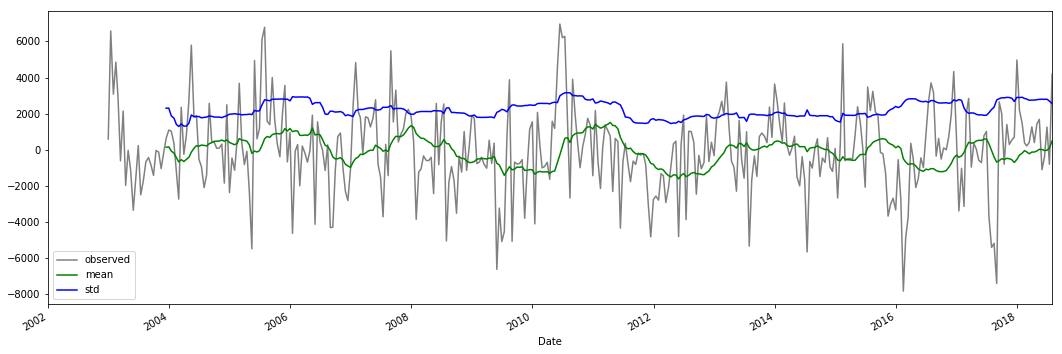

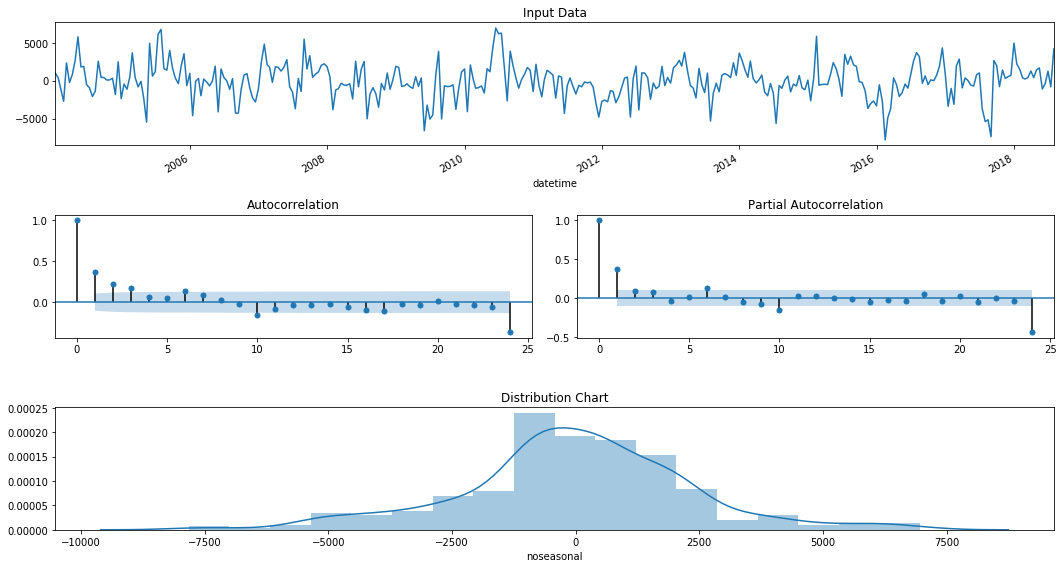

In [12]:
# Second Check by Tests after Seasonal Differecing
print("Stationary by ADF (After Seasonal Diff): {}".format("YES" if ADF_Test(df.noseasonal.dropna()) else "NO"))
print("Stationary by KPSS(After Seasonal Diff): {}".format("YES" if KPSS_Test(df.noseasonal.dropna()) else "NO"),'\n')

# Second Visual check
visual_check(df, "noseasonal", seasons)

# Second Check by ACF & PACF
ACF_PACF_PLOT(df.noseasonal.dropna(inplace=False).iloc[seasons + 1:],seasons)

Now, the main requirement to use SARIMA model is satisfied and the series is stationary. In the following, we will use the original data instead of differencing one but setting D equal to 1 instead. Based on the rules that were introduced before, the initial values for SARIMA parameters are set<p style="text-align: justify;">
* p = 1 (First lag where the PACF value that is above the significance level)
* d = 0 (No trend, differentiating is not helpful)
* q = 1 (First lag where the ACF value that is above the significance level)
* P = 0 (ACF is Negative at lag S)
* D = 1 (Seasonal differencing is helpful)
* Q = 1 or 2 (ACF is Negative at lag S)



We are able to run two models based on the above parameters. In the first try, Grid search method is defined and used to find the models.  

In [13]:
# define the Grid Search to find the best hyper parameters based on lowest AIC
def GS(param_trend_grid,param_grid, seasonal_param_grid):
    
  # Set initial values for hyper-parameters
  lowest_aic = 999999
  best_param_trend=["n"]
  best_param = (1,0,1)
  best_param_seasonal = (1,1,0,24)

  # Grid search  
  for param_trend in param_trend_grid:
     for param in param_grid:
        for param_seasonal in seasonal_param_grid:
            # To Continue in cases that we will have an error 
            try:

              model = sarimax.SARIMAX(df.loc[train_range_re].set_index("datetime").totalconsum,
                                    trend=param_trend,
                                    order=param,
                                    seasonal_order=param_seasonal,
                                    enforce_stationarity=True,
                                    enforce_invertibility=True)
              results = model.fit()
              current_aic = results.aic
            
              # Compare results to select the best hyper-parameters
              if (current_aic <= lowest_aic):
               lowest_aic = current_aic
               best_param_trend=param_trend
               best_param = param
               best_param_seasonal = param_seasonal
               print('SARIMA {}{}x{} - AIC:{}'.format(param_trend,param, param_seasonal, results.aic))
            except:
             continue
            
  print('The best model is: SARIMA {}{}x{} - AIC:{}'.format(best_param_trend,best_param, best_param_seasonal,lowest_aic))
  
  # Regenerate the Best Model
  bestmodel = sarimax.SARIMAX(df.loc[train_range_re].set_index("datetime").totalconsum,
                                    trend=best_param_trend,
                                    order=best_param,
                                    seasonal_order=best_param_seasonal,
                                    enforce_stationarity=True,
                                    enforce_invertibility=True)
  bestresults=bestmodel.fit()
  return bestresults

# Apply Grid Search on SARIMA
param_trend_grid=['n']
param_grid=[(1,0,1)]
seasonal_param_grid=[(0,1,1,24),(0,1,2,24)]
bestresults=GS(param_trend_grid,param_grid, seasonal_param_grid)

SARIMA n(1, 0, 1)x(0, 1, 1, 24) - AIC:4793.018439087105
SARIMA n(1, 0, 1)x(0, 1, 2, 24) - AIC:4788.562015731548
The best model is: SARIMA n(1, 0, 1)x(0, 1, 2, 24) - AIC:4788.562015731548


Based on AIC, the model **(1, 0, 1)x(0, 1, 2, 24)** with **AIC=4788** is the optimum between two above models estimated form ACF and PACF plots. However, due to number of parameters it would be helpful to use Grid search over wide ranges of hyper-parameters (90 runs).<p style="text-align: justify;">

In [14]:
# Specify the type of trend and the ranges for hyper parameters

# The type of trend: No trend and constant trend
param_trend_grid=['n','c']

param_grid=[(1,0,1),(0,0,1),(1,0,0),(2,0,0),(0,0,2),(3,0,0),(0,0,3),(1,0,2),(2,0,1)]
seasonal_param_grid=[(0,1,1,24),(0,1,2,24),(1,1,1,24),(1,0,1,24),(1,0,0,24)]
results=GS(param_trend_grid,param_grid, seasonal_param_grid)


SARIMA n(1, 0, 1)x(0, 1, 1, 24) - AIC:4793.018439087105
SARIMA n(1, 0, 1)x(0, 1, 2, 24) - AIC:4788.562015731548
SARIMA n(1, 0, 1)x(1, 1, 1, 24) - AIC:4787.318826898088
SARIMA n(1, 0, 2)x(0, 1, 1, 24) - AIC:4787.017454543858
SARIMA n(1, 0, 2)x(0, 1, 2, 24) - AIC:4782.429767311101
SARIMA n(1, 0, 2)x(1, 1, 1, 24) - AIC:4780.821117638183
SARIMA n(2, 0, 1)x(1, 1, 1, 24) - AIC:4779.199977296432
The best model is: SARIMA n(2, 0, 1)x(1, 1, 1, 24) - AIC:4779.199977296432


Finally, based on minimization of AIC, the model **(2, 0, 1)x(1, 1, 1, 24)** with **AIC:4779**  is selected as the optimum case. It will be a good practice to use optimization algorithm such as GA to find a robust model. 
In the next, we check the residual of generated model for stationary. The stationary model residual confirms that the generation of model is successful.<p style="text-align: justify;">


Dickey-Fuller Test:
 Test_Statistic         -4.285977
 p_value                 0.000470
 Lags                    1.000000
 No_of_Obs             287.000000
Critical_Value(1%)      -3.453342
Critical_Value(5%)      -2.871664
Critical_Value(10%)     -2.572164
dtype: float64
Stationary by ADF(Model_Residual): YES

KPSS Test:
 Test_Statistic          0.483546
 p_value                 0.045373
 Lags                   24.000000
Critical_Value(10%)      0.347000
Critical_Value(5%)       0.463000
Critical_Value(2.5%)     0.574000
Critical_Value(1%)       0.739000
dtype: float64
Stationary by KPSS(Model_Residual): YES 



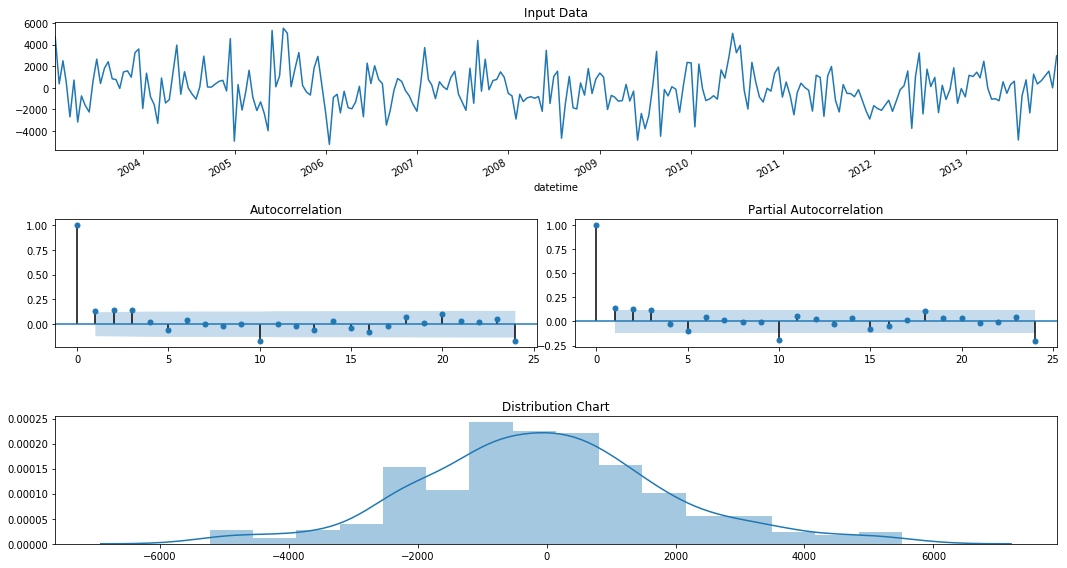

In [15]:
# Check Model Residual by  stationary tests
print("Stationary by ADF(Model_Residual): {}".format("YES" if ADF_Test(results.resid) else "NO"))
print("Stationary by KPSS(Model_Residual): {}".format("YES" if KPSS_Test(results.resid) else "NO"),'\n')
# Check Model Residual by  ACF_PCF_PLOT
ACF_PACF_PLOT(results.resid.dropna(inplace=False).iloc[seasons + 1:],seasons)

After confirming that the model residual is stationary, we proceed to make a prediction using fitted model and plot the results.  

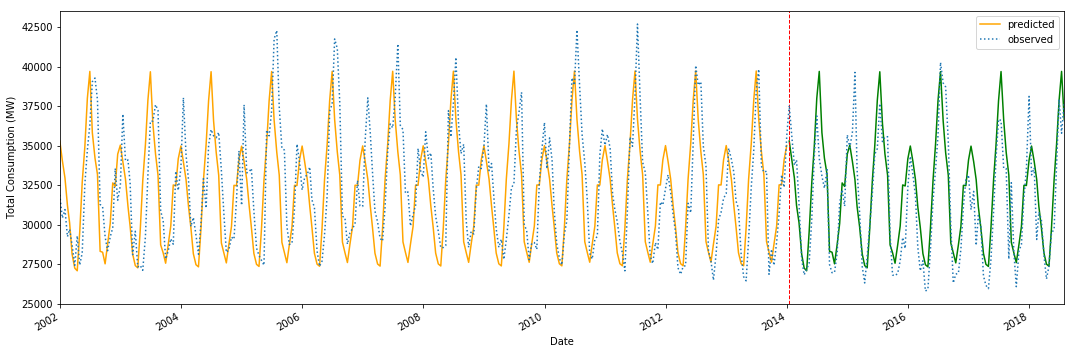

In [51]:
# Make prediction for both training and test sets
tr_steps = train_range_re.shape[0]
te_steps = test_range_re.shape[0]
tr_forecast = results.get_forecast(steps=tr_steps)
te_forecast = results.get_forecast(steps=te_steps)

# Confidence Interval
forecast_ci = te_forecast.conf_int()

# Plot: Forecasts
yhat_train = (tr_forecast.predicted_mean).values
yhat_test = (te_forecast.predicted_mean).values

fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pd.to_datetime(df.loc[train_range_re].datetime.values), yhat_train, color="orange", label="predicted")
ax.plot(pd.to_datetime(df.loc[test_range_re].datetime.values), yhat_test, color="green")
plt.axvline(pd.to_datetime(str(df.loc[test_range_re].datetime.values[0])), c='red', ls='--', lw=1)
df.plot(x="datetime", y="totalconsum", ax=ax, label="observed",ls=":")
plt.legend(loc='best')
plt.xlabel("Date")
plt.ylabel("Total Consumption (MW)")
plt.show();

In the following, the confidence interval for test range is presented.This provides the upper and lower expectations for the real observation.

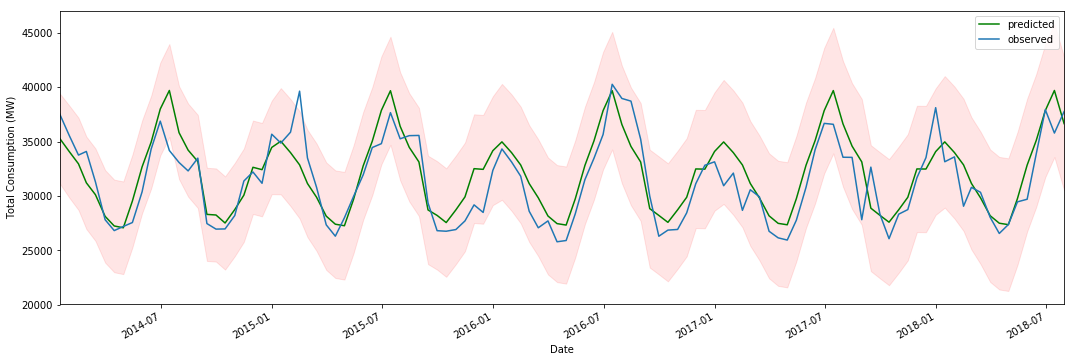

In [27]:
# Plot Confidence interval for Test data
fig, ax = plt.subplots(figsize=(18,6))
ax.plot(pd.to_datetime(df.loc[test_range_re].datetime.values), yhat_test, color="green", label="predicted")
ax.fill_between(
    pd.to_datetime(df.loc[test_range_re].datetime.values),
    (forecast_ci['lower totalconsum']),
    (forecast_ci['upper totalconsum']),
    color='r',
    alpha=0.1)
df.loc[test_range_re].plot(x="datetime", y="totalconsum", ax=ax, label="observed")
plt.legend(loc='best')
plt.xlabel("Date")
plt.ylabel("Total Consumption (MW)")
plt.show();

Finally, MAE, MSE and R<sup>2</sup> criteria are used to evaluate the forecast. As you can see the R<sup>2</sup> for test range is around 70%. 

In [53]:
# Evaluate the forecast
mae = mean_absolute_error(y_test, yhat_test)
mse = mean_squared_error(y_test, yhat_test)
r2_te = r2_score(y_test, yhat_test)
print("MAE (test): {:0.0f}".format(mae))
print("MSE (test): {:0.0f}".format(mse))
print("R2  (test): {:0.3f}".format(r2_te))

MAE (test): 1602
MSE (test): 4172186
R2  (test): 0.703
